In [2]:
import paddle
from paddle.nn import Conv2D, MaxPool2D, Linear, Dropout
import paddle.nn.functional as F

## AlexNet

AlexNet与LeNet相比，具有更深的网络结构，包含5层卷积和3层全连接，同时使用了如下三种方法改进模型的训练过程：
- 数据增广：深度学习中常用的一种处理方式，通过对训练随机加一些变化，比如平移、缩放、裁剪、旋转、翻转或者增减亮度等，产生一系列跟原始图片相似但又不完全相同的样本，从而扩大训练数据集。通过这种方式，可以随机改变训练样本，避免模型过度依赖于某些属性，能从一定程度上抑制过拟合。
- 使用Dropout抑制过拟合。
- 使用ReLU激活函数减少梯度消失现象。

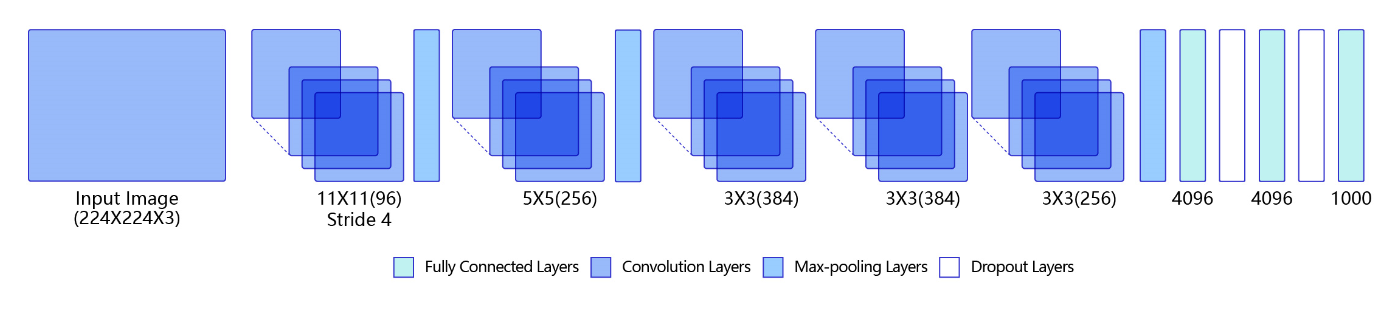

In [9]:
# 自定义AlexNet网络结构
class AlexNet(paddle.nn.Layer):
    def __init__(self, num_classes=1):
        super(AlexNet, self).__init__()
        
        # 同时使用卷积和池化层提取图像特征
        self.conv1 = Conv2D(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=5)
        self.pool1 = MaxPool2D(kernel_size=2, stride=2)
        
        self.conv2 = Conv2D(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2, stride=2)
        
        self.conv3 = Conv2D(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = Conv2D(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = Conv2D(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.pool5 = MaxPool2D(kernel_size=2, stride=2)
        
        self.fc1 = Linear(in_features=12544, out_features=4096)
        self.drop_ratio1 = 0.5
        self.drop1 = Dropout(self.drop_ratio1)
        
        self.fc2 = Linear(in_features=4096, out_features=4096)
        self.drop_ratio2 = 0.5
        self.drop2 = Dropout(self.drop_ratio2)
        
        self.fc3 = Linear(in_features=4096, out_features=num_classes)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)  # 使用ReLU激活函数
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool5(x)
        
        x = paddle.reshape(x, [x.shape[0], -1])
        x = self.fc1(x)
        x = F.relu(x)
        x = self.drop1(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        x = self.drop2(x)
        
        x = self.fc3(x)
        
        return x

In [10]:
alex_net = AlexNet()

paddle.summary(alex_net, (1, 3, 224, 224))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-26     [[1, 3, 224, 224]]    [1, 96, 56, 56]        34,944     
 MaxPool2D-16    [[1, 96, 56, 56]]     [1, 96, 28, 28]           0       
   Conv2D-27     [[1, 96, 28, 28]]     [1, 256, 28, 28]       614,656    
 MaxPool2D-17    [[1, 256, 28, 28]]    [1, 256, 14, 14]          0       
   Conv2D-28     [[1, 256, 14, 14]]    [1, 384, 14, 14]       885,120    
   Conv2D-29     [[1, 384, 14, 14]]    [1, 384, 14, 14]      1,327,488   
   Conv2D-30     [[1, 384, 14, 14]]    [1, 256, 14, 14]       884,992    
 MaxPool2D-18    [[1, 256, 14, 14]]     [1, 256, 7, 7]           0       
   Linear-11        [[1, 12544]]          [1, 4096]         51,384,320   
   Dropout-6        [[1, 4096]]           [1, 4096]              0       
   Linear-12        [[1, 4096]]           [1, 4096]         16,781,312   
   Dropout-7        [[1, 4096]]     

{'total_params': 71916929, 'trainable_params': 71916929}

In [11]:
alex_net2 = paddle.vision.models.AlexNet()

paddle.summary(alex_net, (1, 3, 224, 224))

---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Conv2D-26     [[1, 3, 224, 224]]    [1, 96, 56, 56]        34,944     
 MaxPool2D-16    [[1, 96, 56, 56]]     [1, 96, 28, 28]           0       
   Conv2D-27     [[1, 96, 28, 28]]     [1, 256, 28, 28]       614,656    
 MaxPool2D-17    [[1, 256, 28, 28]]    [1, 256, 14, 14]          0       
   Conv2D-28     [[1, 256, 14, 14]]    [1, 384, 14, 14]       885,120    
   Conv2D-29     [[1, 384, 14, 14]]    [1, 384, 14, 14]      1,327,488   
   Conv2D-30     [[1, 384, 14, 14]]    [1, 256, 14, 14]       884,992    
 MaxPool2D-18    [[1, 256, 14, 14]]     [1, 256, 7, 7]           0       
   Linear-11        [[1, 12544]]          [1, 4096]         51,384,320   
   Dropout-6        [[1, 4096]]           [1, 4096]              0       
   Linear-12        [[1, 4096]]           [1, 4096]         16,781,312   
   Dropout-7        [[1, 4096]]     

{'total_params': 71916929, 'trainable_params': 71916929}

## VGG

- VGG通过使用一系列大小为3x3的小尺寸卷积核和池化层构造深度卷积神经网络，因为结构简单、应用性极强而广受欢迎。
- VGG有13层卷积和3层全连接层，严格使用3×3的卷积层和池化层来提取特征，并在网络的最后面使用三层全连接层，将最后一层全连接层的输出作为分类的预测。
- 在每层卷积将使用ReLU作为激活函数，在全连接层之后添加dropout来抑制过拟合。
- 使用小的卷积核能够有效地减少参数的个数，使得训练和测试变得更加有效。
- VGG模型的成功证明了增加网络的深度，可以更好的学习图像中的特征模式。

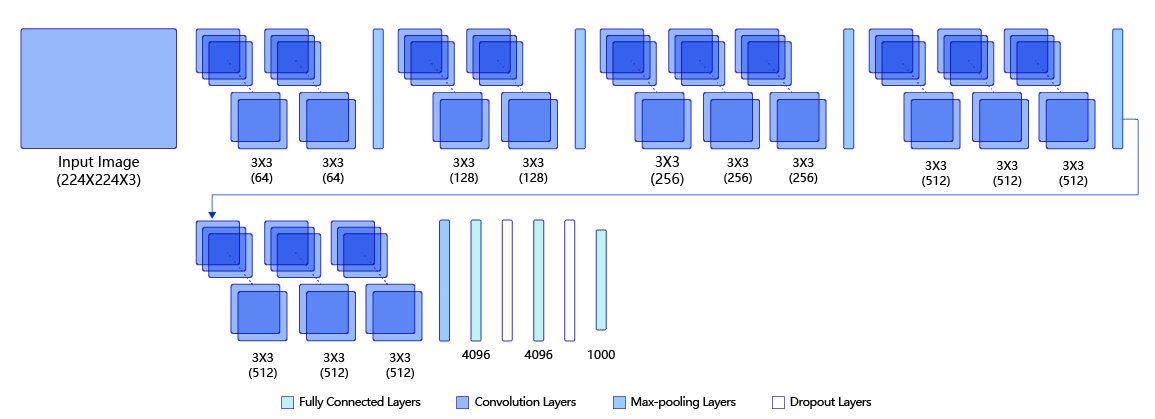

In [16]:
from paddle.vision.models.vgg import make_layers

vgg_cfg = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

features = make_layers(vgg_cfg)

# @features VGG模型的特征层，由函数make_layers生成
vgg = paddle.vision.models.VGG(features=features, num_classes=1)

paddle.summary(vgg, (1, 3, 224, 224))

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
     Conv2D-44       [[1, 3, 224, 224]]   [1, 64, 224, 224]        1,792     
      ReLU-18       [[1, 64, 224, 224]]   [1, 64, 224, 224]          0       
   MaxPool2D-27     [[1, 64, 224, 224]]   [1, 64, 112, 112]          0       
     Conv2D-45      [[1, 64, 112, 112]]   [1, 128, 112, 112]      73,856     
      ReLU-19       [[1, 128, 112, 112]]  [1, 128, 112, 112]         0       
   MaxPool2D-28     [[1, 128, 112, 112]]   [1, 128, 56, 56]          0       
     Conv2D-46       [[1, 128, 56, 56]]    [1, 256, 56, 56]       295,168    
      ReLU-20        [[1, 256, 56, 56]]    [1, 256, 56, 56]          0       
     Conv2D-47       [[1, 256, 56, 56]]    [1, 256, 56, 56]       590,080    
      ReLU-21        [[1, 256, 56, 56]]    [1, 256, 56, 56]          0       
   MaxPool2D-29      [[1, 256, 56, 56]]    [1, 256, 28, 28]   

{'total_params': 128770433, 'trainable_params': 128770433}

## GoogLeNet

- 空间分布范围更广的图像信息适合用较大的卷积核来提取其特征；而空间分布范围较小的图像信息则适合用较小的卷积核来提取其特征。
- GoogLeNet使用了一种被称为Inception模块的方案。

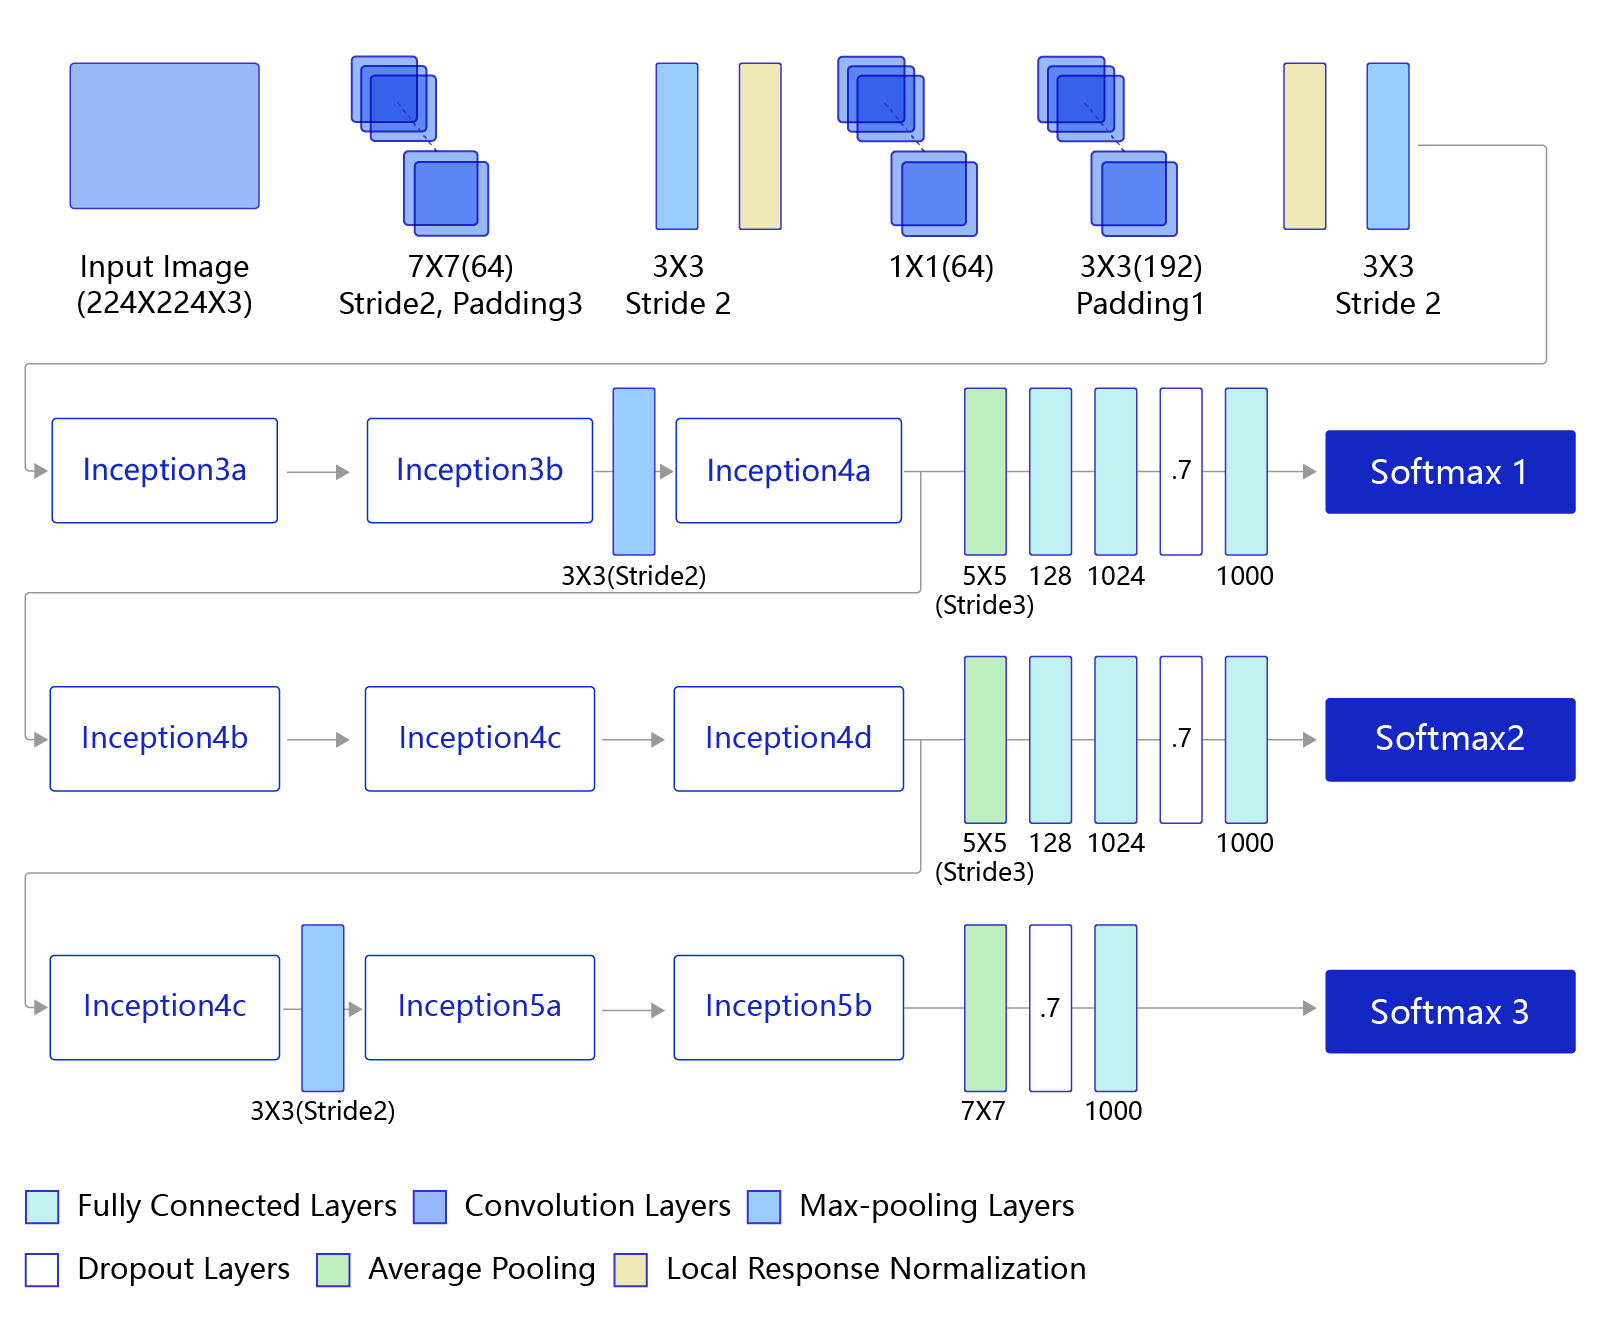

In [17]:
goog_lenet = paddle.vision.models.GoogLeNet()

paddle.summary(goog_lenet, (1, 3, 224, 224))

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
     Conv2D-52       [[1, 3, 224, 224]]   [1, 64, 112, 112]        9,408     
    ConvLayer-1      [[1, 3, 224, 224]]   [1, 64, 112, 112]          0       
   MaxPool2D-32      [[1, 832, 13, 13]]     [1, 832, 6, 6]           0       
     Conv2D-53       [[1, 64, 55, 55]]     [1, 64, 55, 55]         4,096     
    ConvLayer-2      [[1, 64, 55, 55]]     [1, 64, 55, 55]           0       
     Conv2D-54       [[1, 64, 55, 55]]     [1, 192, 55, 55]       110,592    
    ConvLayer-3      [[1, 64, 55, 55]]     [1, 192, 55, 55]          0       
     Conv2D-55       [[1, 192, 27, 27]]    [1, 64, 27, 27]        12,288     
    ConvLayer-4      [[1, 192, 27, 27]]    [1, 64, 27, 27]           0       
     Conv2D-56       [[1, 192, 27, 27]]    [1, 96, 27, 27]        18,432     
    ConvLayer-5      [[1, 192, 27, 27]]    [1, 96, 27, 27]    

{'total_params': 11535736, 'trainable_params': 11535736}

## ResNet

- 实践证明，随着网络层数的增加，训练误差往往不降反升，可以使用残差网络ResNet来解决该问题。
- ResNet-50模型，一共包含49层卷积和1层全连接，其网络结构如下

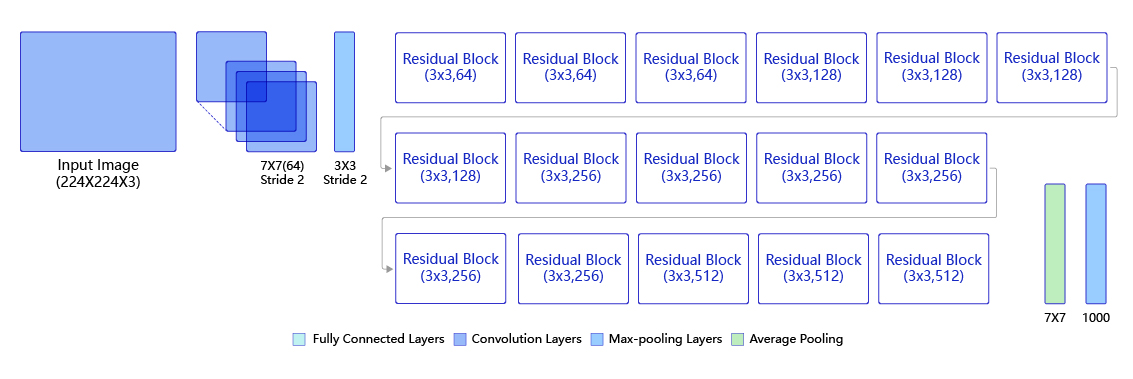

In [18]:
# @pretrained 是否加载resnet50在imagenet数据集上的预训练模型
res_net = paddle.vision.models.resnet50(pretrained=False)

paddle.summary(res_net, (1, 3, 224, 224))

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
    Conv2D-111       [[1, 3, 224, 224]]   [1, 64, 112, 112]        9,408     
   BatchNorm2D-1    [[1, 64, 112, 112]]   [1, 64, 112, 112]         256      
      ReLU-28       [[1, 64, 112, 112]]   [1, 64, 112, 112]          0       
   MaxPool2D-42     [[1, 64, 112, 112]]    [1, 64, 56, 56]           0       
    Conv2D-113       [[1, 64, 56, 56]]     [1, 64, 56, 56]         4,096     
   BatchNorm2D-3     [[1, 64, 56, 56]]     [1, 64, 56, 56]          256      
      ReLU-29        [[1, 256, 56, 56]]    [1, 256, 56, 56]          0       
    Conv2D-114       [[1, 64, 56, 56]]     [1, 64, 56, 56]        36,864     
   BatchNorm2D-4     [[1, 64, 56, 56]]     [1, 64, 56, 56]          256      
    Conv2D-115       [[1, 64, 56, 56]]     [1, 256, 56, 56]       16,384     
   BatchNorm2D-5     [[1, 256, 56, 56]]    [1, 256, 56, 56]   

{'total_params': 25610152, 'trainable_params': 25503912}

## 使用高层API快速构建深度学习任务

In [ ]:
# 使用resnet50在Cifar10数据集上进行训练
from paddle.vision.models import resnet50
from paddle.vision.datasets import Cifar10
from paddle.optimizer import Momentum
from paddle.regularizer import L2Decay
from paddle.nn import CrossEntropyLoss
from paddle.metric import Accuracy
from paddle.vision.transforms import Transpose

# 设置加载的图像为np.ndarray类型
paddle.vision.set_image_backend('cv2')

# 加载数据集
train_dataset = Cifar10(mode='train', transform=Transpose())
test_dataset = Cifar10(mode='test', transform=Transpose())

# 创建模型实例
model = paddle.Model(resnet50(pretrained=False, num_classes=10))

# 定义优化器
optimizer = Momentum(learning_rate=0.01, momentum=0.9, weight_decay=L2Decay(1e-4), parameters=model.parameters())

# 训练配置
model.prepare(optimizer, CrossEntropyLoss(), Accuracy(topk=(1, 5)))

# 启动训练
model.fit(train_dataset, test_dataset, epochs=5, batch_size=100)